epoch,train_loss,valid_loss,accuracy,time
0,1.616296,1.778345,0.459854,00:02
1,1.337540,2.286204,0.434712,00:00
2,1.195756,1.283669,0.622060,00:00
3,1.077281,1.059134,0.657340,00:00
4,0.988437,0.938603,0.700324,00:00
5,0.908000,0.994830,0.673155,00:00
6,0.826227,1.050753,0.652879,00:00
7,0.735514,0.901531,0.709246,00:00
8,0.635027,0.888771,0.723439,00:00
9,0.559893,0.878937,0.725061,00:00


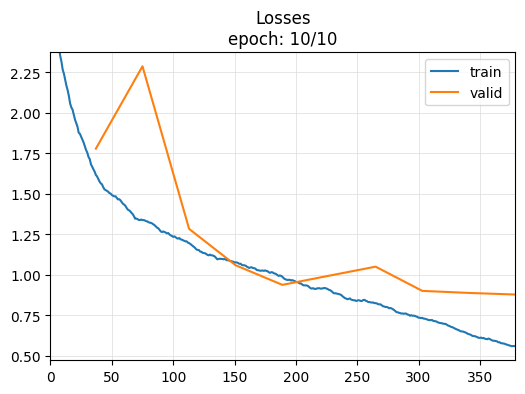

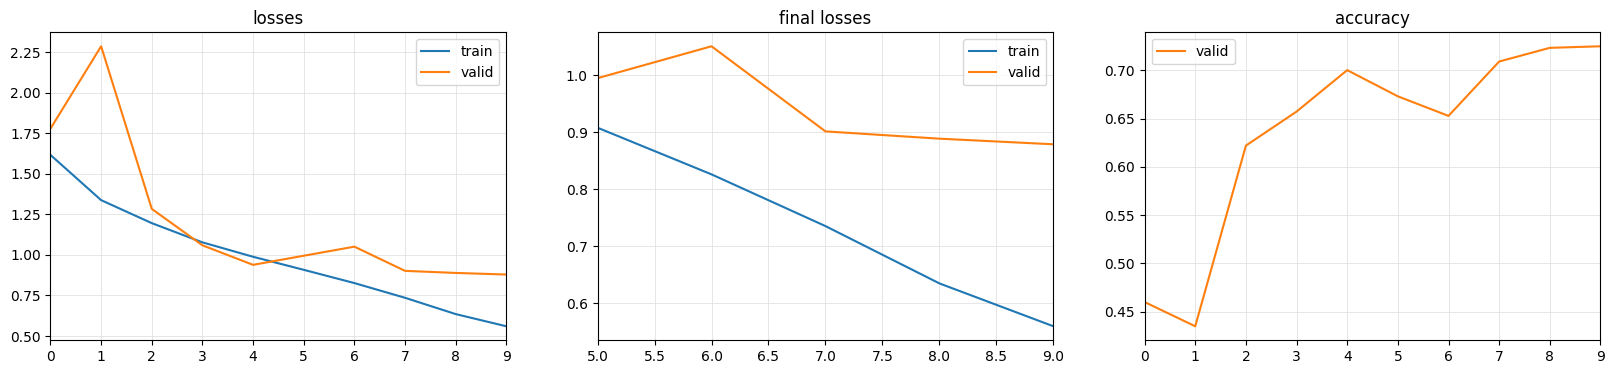

In [1]:
from tsai.basics import *

X, y, splits = get_classification_data('LSST', split_data=False)
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
mv_clf = TSClassifier(X, y, splits=splits, path='models', arch="InceptionTimePlus", tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
mv_clf.fit_one_cycle(10, 1e-2)
mv_clf.export("mv_clf.pkl")

In [2]:
from tsai.inference import load_learner

mv_clf = load_learner("models/mv_clf.pkl")
probas, target, preds = mv_clf.get_X_preds(X[splits[1]], y[splits[1]])